Estrutura de Dados - Listas e deques
==========================================

Capítulo 10 do livro texto sugerido:
Introduction to Algorithms, Fourth Edition
By Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest and Clifford Stein
https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/

Conteúdo
========

## Listas
Como mostrado na Seção de introdução, listas são implementadas de maneira bastante semelhante com pilhas e filas.

São compostas por elementos de lista contendo um valor e uma referência para o elemento, a sua frente, enquanto a fila contém a referência para o primeiro elemento.

Diferente da pilha e fila, porém, a posição de inserção e remoção dos dados não é pré-determinada, aumentando a complexidade da gerência dos dados nesta estrutura.

A implementação de uma lista é mostrada abaixo

In [19]:
class ElementoLista():
    def __init__(self, valorInicial):
        # Cria um elemento de lista
        # contendo o valor enfileirado
        self.valor = valorInicial
        # e a referência para o elemento seguinte a ele na lista
        self.proximo = None

class Lista():
    def __init__(self):
        # Cria uma lista vazia
        self.primeiroElementoLista = None

    def buscaElementoPosicao(self, posicao):
        # Procure o elemento atualmente na posição
        elementoPosicao = self.primeiroElementoLista
        posicaoBuscada = 0
        while posicaoBuscada != posicao:
            if elementoPosicao is None:
                raise Exception(f"Posição não existente na lista: {posicao}")
            if elementoPosicao.proximo is None and posicao == -1:
                return elementoPosicao
            elementoPosicao = elementoPosicao.proximo
            posicaoBuscada += 1
        return elementoPosicao

    def insereValor(self, valor, posicao=0):
        # Cria um elemento para a lista
        novoElementoLista = ElementoLista(valorInicial=valor)

        if posicao == -1 and self.primeiroElementoLista is None:
                self.primeiroElementoLista = novoElementoLista
                return None

        # E a posição de inserção seja a primeira posição
        if posicao == 0:
            if self.primeiroElementoLista is not None:
                novoElementoLista.proximo = self.primeiroElementoLista
            self.primeiroElementoLista = novoElementoLista
        # Se a lista não estiver vazia
        else:
            posicao += 0 if posicao != -1 else 1
            # Busca elemento anterior a posição
            elementoPosicao = self.buscaElementoPosicao(posicao-1)
            # Salva a referência para o elemento na
            # posição como próximo do novo elemento
            novoElementoLista.proximo = elementoPosicao.proximo
            # Substitui elemento na posição pelo novo elemento
            elementoPosicao.proximo = novoElementoLista
        return None

    def removerValor(self, posicao=0):
        if posicao == 0:
            if self.primeiroElementoLista is None:
                return None
            else:
                elementoRemovido = self.primeiroElementoLista
                self.primeiroElementoLista = self.primeiroElementoLista.proximo
                return elementoRemovido.valor
        else:
            elementoPosicao = self.buscaElementoPosicao(posicao-1)
            if elementoPosicao.proximo is not None:
                elementoRemovido = elementoPosicao.proximo
                elementoPosicao.proximo = elementoRemovido.proximo
                return elementoRemovido.valor
            return None

Quando inserimos um elemento na primeira posição, temos complexidade superior assintótica $O(1)$ para gravar a referência/ponteiro para o próximo elemento do novo elemento (`novoElementoLista.proximo = self.primeiroElementoLista`) e substituir as referências/ponteiros do início da lista pelo novo elemento (`self.primeiroElementoLista = novoElementoLista`).

Para mostrar que de fato estas operações são rápidas, utilizaremos as seguintes funções.

In [20]:
import time
from functools import partial
import statistics
from matplotlib import pyplot as plt

# Função decoradora que envelopa chamada original
# e calcula o tempo passado
def marcaTempo(func):
    def funcWrapper(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fim = time.time()
        #print(f"Tempo gasto em {func.__name__}: {fim-inicio}s")
        return resultado, fim-inicio
    return funcWrapper

# Função de benchmark
def benchmark(func, itens=10000, pulaImpressao=False):
    tempos = []
    for i in range(itens):
        resultado, tempo = func(valor=i)
        tempos.append(tempo)
    if not pulaImpressao:
        print(f"Benchmark levou {sum(tempos):.2E}s no total, e {statistics.mean(tempos):.2E}±{statistics.stdev(tempos):.2E}s por iteração")
        plt.scatter(list(range(itens)), tempos)
        plt.ylabel("Tempo (s)")
        plt.show()

Com as funções de benchmark prontas, podemos executar nossos testes.

Primeiro inserindo 10 mil elementos no início da lista.

Benchmark levou 2.58E-02s no total, e 2.58E-06±2.04E-05s por iteração


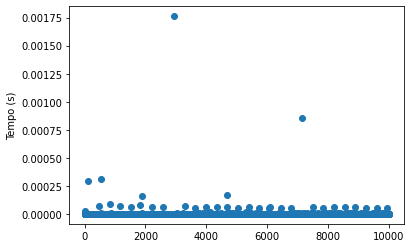

In [21]:
listaTeste = Lista()

# Cria uma função a partir de outra função e
# parte dos seus parâmetros.
# Para executá-la, basta chamar func(),
# assim como feito pelo benchmark
func = partial(marcaTempo(listaTeste.insereValor), posicao=0)
benchmark(func)

Muito rápido, exceto por alguns outliers.

Agora tentemos colocar sempre no final da lista.

Como a lista vai crescendo, temos que buscar a última posição cada vez mais distante do início ($O(n)$).

Benchmark levou 5.12E+00s no total, e 5.12E-04±6.20E-04s por iteração


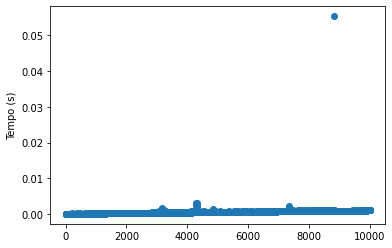

In [22]:
listaTeste = Lista()

# Cria uma função a partir de outra função e
# parte dos seus parâmetros.
# Para executá-la, basta chamar func(),
# assim como feito pelo benchmark
func = partial(marcaTempo(listaTeste.insereValor), posicao=-1)
benchmark(func)

Pelos resultados (olhe as diferentes escalas e ignore os outliers), adicionar sempre no final da lista foi bem mais lento.

Graficamente, também vemos que o tempo levado por iteração é menos regular.

Uma das possíveis melhorias para permitir inserção mais rápida também na última posição, é modificando a implementação da nossa lista.

In [23]:
class ListaComElementoFinal():
    def __init__(self):
        # Cria uma lista vazia
        self.primeiroElementoLista = None
        self.ultimoElementoLista = None

    def buscaElementoPosicao(self, posicao):
        # Procure o elemento atualmente na posição
        elementoPosicao = self.primeiroElementoLista
        posicaoBuscada = 0
        while posicaoBuscada != posicao:
            if elementoPosicao is None:
                raise Exception(f"Posição não existente na lista: {posicao}")
            if elementoPosicao.proximo is None and posicao == -1:
                return elementoPosicao
            if elementoPosicao.proximo.proximo is None and posicao == -2:
                return elementoPosicao
            elementoPosicao = elementoPosicao.proximo
            posicaoBuscada += 1
        return elementoPosicao

    def insereValor(self, valor, posicao=0):
        # Cria um elemento para a lista
        novoElementoLista = ElementoLista(valorInicial=valor)

        if posicao == -1 and self.primeiroElementoLista is None:
                self.primeiroElementoLista = novoElementoLista
                self.ultimoElementoLista = novoElementoLista
                return None

        # E a posição de inserção seja a primeira posição
        if posicao == 0:
            if self.primeiroElementoLista is not None:
                novoElementoLista.proximo = self.primeiroElementoLista
            else:
                self.ultimoElementoLista = novoElementoLista
            self.primeiroElementoLista = novoElementoLista
        elif posicao == -1:
            # Muda referência para próximo elemento colocado ao final da lista
            self.ultimoElementoLista.proximo = novoElementoLista
            # Atualiza novo ultimo elemento
            self.ultimoElementoLista = novoElementoLista
        # Se a lista não estiver vazia
        else:
            # Busca elemento anterior a posição
            elementoPosicao = self.buscaElementoPosicao(posicao-1)
            # Salva a referência para o elemento na
            # posição como próximo do novo elemento
            novoElementoLista.proximo = elementoPosicao.proximo
            # Substitui elemento na posição pelo novo elemento
            elementoPosicao.proximo = novoElementoLista
        return None

    def removerValor(self, posicao=0):
        if posicao == 0:
            if self.primeiroElementoLista is None:
                return None
            else:
                elementoRemovido = self.primeiroElementoLista
                self.primeiroElementoLista = self.primeiroElementoLista.proximo
                if self.primeiroElementoLista is None:
                    self.ultimoElementoLista = None
                return elementoRemovido.valor
        else:
            if posicao == -1 and self.primeiroElementoLista == self.ultimoElementoLista:
                elementoRemovido = self.primeiroElementoLista
                self.primeiroElementoLista = None
                self.ultimoElementoLista = None
                return elementoRemovido
            elementoPosicao = self.buscaElementoPosicao(posicao-1)
            if elementoPosicao.proximo is not None:
                elementoRemovido = elementoPosicao.proximo
                elementoPosicao.proximo = elementoRemovido.proximo
                if self.ultimoElementoLista == elementoRemovido:
                    self.ultimoElementoLista = elementoPosicao
                return elementoRemovido.valor
            return None

Agora o desempenho deve ser similar inserindo elementos em ambos os lados

Benchmark levou 1.08E-02s no total, e 1.08E-06±7.79E-06s por iteração


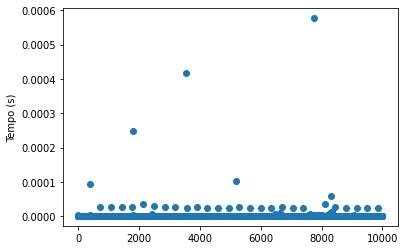

In [24]:
listaTeste = ListaComElementoFinal()
func = partial(marcaTempo(listaTeste.insereValor), posicao=-1)
benchmark(func)

E agora para tirar estes elementos? Como será o comportamento

Benchmark levou 4.99E-03s no total, e 4.99E-07±1.22E-06s por iteração


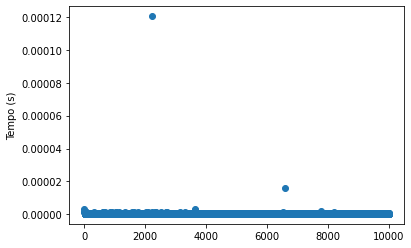

In [25]:
def benchmarkRemocao(func, itens=10000, pulaImpressao=False):
    tempos = []
    for i in range(itens):
        resultado, tempo = func()
        tempos.append(tempo)
    if not pulaImpressao:
        print(f"Benchmark levou {sum(tempos):.2E}s no total, e {statistics.mean(tempos):.2E}±{statistics.stdev(tempos):.2E}s por iteração")
        plt.scatter(list(range(itens)), tempos)
        plt.ylabel("Tempo (s)")
        plt.show()

func = partial(marcaTempo(listaTeste.removerValor), posicao=0)
benchmarkRemocao(func)

Também bastante rápido removendo do começo da lista.

O problema vem na hora de remover elementos do final.

Não tem escapatória, já que mesmo com a referência para o último elemento, não podemos removê-lo e atualizar o elemento anterior a ele para ser o novo último elemento.

Benchmark levou 6.82E+00s no total, e 6.82E-04±4.58E-04s por iteração


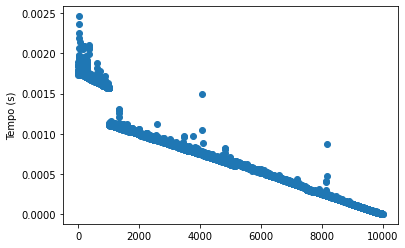

In [26]:
func = partial(marcaTempo(listaTeste.insereValor), posicao=-1)
benchmark(func, pulaImpressao=True)
func = partial(marcaTempo(listaTeste.removerValor), posicao=-1)
benchmarkRemocao(func)

Extremamente lento. Mas há uma solução.

Uma estrutura de dados diferente, agora duplamente encadeada.

## Deque

O deque corrige este problema da lista, colocando referências também para os elementos anteriores, e não somente para os elementos posteriores.

Isto permite remoção rápida dos elementos em ambas as extremidades.

In [27]:
class ElementoDeque():
    def __init__(self, valorInicial):
        # Cria um elemento de deque
        # contendo o valor enfileirado
        self.valor = valorInicial
        # e a referência para o elemento posterior a ele no deque
        self.proximo = None
        # e a referência para o elemento anterior a ele no deque
        self.anterior = None

class Deque():
    def __init__(self):
        # Cria um deque vazia
        self.primeiroElementoDeque = None
        self.ultimoElementoDeque = None

    def buscaElementoPosicao(self, posicao):
        # Procure o elemento atualmente na posição
        elementoPosicao = self.primeiroElementoDeque
        posicaoBuscada = posicao
        while posicaoBuscada > 0:
            if elementoPosicao is None:
                raise Exception(f"Posição não existente no deque: {posicao}")
            elementoPosicao = elementoPosicao.proximo
            posicaoBuscada -= 1
        return elementoPosicao

    def insereNovoElemento(self, novoElemento, elementoPosicao):
        # Salva a referência para o elemento na
        # posição como próximo do novo elemento
        #
        #            novoElemento
        #         anterior  proximo
        #                   |
        #                   v
        # | posicao-1 |  posicao  | posicao+1
        # | proximo-> | proximo-> | proximo->
        # | <-anterior|<-anterior |<-anterior
        novoElemento.proximo = elementoPosicao

        # Salva a referência para o elemento anterior
        # ao da posição como anterior do novo elemento
        #
        #            novoElemento
        #         anterior  proximo
        #           |       |
        #           v       v
        # | posicao-1 |  posicao  | posicao+1
        # | proximo-> | proximo-> | proximo->
        # | <-anterior|<-anterior |<-anterior
        novoElemento.anterior = elementoPosicao.anterior

        # Atualiza referencia do elemento posterior do elemento
        # anterior para o novo elemento
        #
        #            novoElemento
        #     anterior  ^    proximo
        #           |   |    |
        #           v   |    v
        # | posicao-1   |    posicao    | posicao+1
        # | proximo-----^    proximo->  | proximo->
        # | <-anterior       <-anterior |<-anterior
        # Salva a referência para o elemento anterior ao movido
        if elementoPosicao.anterior is not None:
            elementoPosicao.anterior.proximo = novoElemento

        # Atualiza referencia do elemento anterior do elemento
        # na posição para o novo elemento
        #
        #            novoElemento
        #     anterior  ^ ^  proximo
        #           |   | |   |
        #           v   | |   v
        # | posicao-1   | |   posicao    | posicao+1
        # | proximo-----^ |   proximo->  | proximo->
        # | <-anterior    ^----anterior  |<-anterior
        elementoPosicao.anterior = novoElemento

        if elementoPosicao == self.primeiroElementoDeque:
            self.primeiroElementoDeque = self.primeiroElementoDeque.anterior

    def insereValor(self, valor, posicao=0):
        # Cria um elemento para o deque
        novoElementoDeque = ElementoDeque(valorInicial=valor)

        # E a posição de inserção seja a primeira posição
        if self.primeiroElementoDeque is None:
            self.primeiroElementoDeque = novoElementoDeque
            self.ultimoElementoDeque = self.primeiroElementoDeque
        # Se a deque não estiver vazia
        else:
            if posicao == 0:
                novoElementoDeque.proximo = self.primeiroElementoDeque
                self.primeiroElementoDeque.anterior = novoElementoDeque
                self.primeiroElementoDeque = novoElementoDeque
            elif posicao == -1:
                self.ultimoElementoDeque.proximo = novoElementoDeque
                novoElementoDeque.anterior = self.ultimoElementoDeque
                self.ultimoElementoDeque = novoElementoDeque
            else:
                # Busca elemento anterior a posicao
                #                  v
                # | posicao-1 |  posicao  | posicao+1
                # | proximo-> | proximo-> | proximo->
                #
                elementoPosicao = self.buscaElementoPosicao(posicao) if posicao > 0 else self.primeiroElementoDeque

                # Reorganizando
                #                novoElemento
                #                    v
                # | posicao-1  | posicao    | posicao+1 | posicao+2
                # | proximo->  | proximo->  | proximo-> | proximo->
                # | <-anterior | <-anterior |<-anterior |<-anterior
                self.insereNovoElemento(novoElementoDeque, elementoPosicao)

    def removerValor(self, posicao=0):
        if self.primeiroElementoDeque is None or self.ultimoElementoDeque is None:
            return None
        else:
            # inicio el0 | el1 | el2 | ... | eln | fim el-1
            if posicao == 0:
                elementoPosicao = self.primeiroElementoDeque

                # Se estivermos tirando um elemento que seja o primeiro
                #   primeiro    el removido   ultimo
                # | posicao    | posicao+1  | posicao+2
                # | proximo->  | proximo->  | proximo->
                # | <-anterior | <-anterior |<-anterior
                self.primeiroElementoDeque = elementoPosicao.proximo
                #  el removido    primeiro     ultimo
                # | posicao    | posicao+1  | posicao+2
                # | proximo->  | proximo->  | proximo->
                # | <-anterior | <-anterior |<-anterior
                # Se havia de fato um valor na posicao+1, não era um None,
                # precisamos arrumar a referência para o elemento anterior removido
                if self.primeiroElementoDeque:
                    self.primeiroElementoDeque.anterior = None
                else:
                    self.ultimoElementoDeque = None
            elif posicao == -1:
                elementoPosicao = self.ultimoElementoDeque

                # Se estivermos tirando um elemento que seja o último
                #   primeiro                  ultimo
                # | posicao-2  | posicao-1  | posicao
                # | proximo->  | proximo->  | proximo->
                # | <-anterior | <-anterior |<-anterior
                # Primeiro atualizamos a referencia para o último elemento
                self.ultimoElementoDeque = elementoPosicao.anterior

                #   primeiro     ultimo        el removido
                # | posicao-2  | posicao-1  | posicao
                # | proximo->  | proximo->None| proximo->
                # | <-anterior | <-anterior |<-anterior
                # Em seguida removemos a referência para o próximo elemento
                if self.ultimoElementoDeque:
                    self.ultimoElementoDeque.proximo = None
                else:
                    self.primeiroElementoDeque = None
            else:
                elementoPosicao = self.buscaElementoPosicao(posicao)

                if posicao != -1 and elementoPosicao == self.ultimoElementoDeque:
                    return self.removerValor(-1)

                # Se estivermos tirando um elemento que não seja o primeiro
                #   primeiro                  ultimo
                # | posicao-1  | posicao    | posicao+1
                # | proximo->  | proximo->  | proximo->
                # | <-anterior | <-anterior |<-anterior
                elementoPosicao.anterior.proximo = elementoPosicao.proximo
                #   primeiro    el removido   ultimo
                # | posicao-1  | posicao    | posicao+1
                # | proximo---------------->| proximo->
                # | <-anterior | <-anterior |<-anterior

                # Se estivermos tirando um elemento que não seja o primeiro
                #   primeiro                  ultimo
                # | posicao-1  | posicao    | posicao+1
                # | proximo---------------->| proximo->
                # | <-anterior | <-anterior |<-anterior
                # Precisamos arrumar a referência anterior do próximo elemento
                elementoPosicao.proximo.anterior = elementoPosicao.anterior
                #   primeiro     el removido  ultimo
                # | posicao-1  | posicao    | posicao+1
                # | proximo---------------->| proximo->
                # | <-anterior |<-------------anterior

            if self.ultimoElementoDeque is None or self.primeiroElementoDeque is None:
                self.primeiroElementoDeque = self.ultimoElementoDeque = None
            return elementoPosicao.valor

    def push_left(self, valor):
        self.insereValor(valor, 0)
    def push_right(self, valor):
        self.insereValor(valor, -1)
    def pop_left(self):
        return self.removerValor(0)
    def pop_right(self):
        return self.removerValor(-1)
deque = Deque()


Agora precisamos testar este deque. Primeiro testaremos se podemos acrescentar e remover elementos por ambos os lados corretamente

In [28]:
deque.push_left(1)
deque.push_right(2)
deque.push_left(3)
deque.push_right(4)
saida_esquerda = [deque.pop_left() for _ in range(4)]
deque.push_left(1)
deque.push_right(2)
deque.push_left(3)
deque.push_right(4)
saida_direita = [deque.pop_right() for _ in range(4)]
print(f"Saida pela esquerda: {saida_esquerda}, esperando [3,1,2,4]")
print(f"Saida pela direita: {saida_direita}, esperando [4,2,1,3]")
print("São o inverso?", saida_esquerda == list(reversed(saida_direita)))

Saida pela esquerda: [3, 1, 2, 4], esperando [3,1,2,4]
Saida pela direita: [4, 2, 1, 3], esperando [4,2,1,3]
São o inverso? True


Em seguida, testaremos o que acontece se tentarmos tirar mais elementos que os contidos

In [29]:
deque.push_left(1)
deque.push_right(2)
deque.push_left(3)
deque.push_right(4)
print([deque.pop_left() for _ in range(5)])
deque.push_left(1)
deque.push_right(2)
deque.push_left(3)
deque.push_right(4)
print([deque.pop_right() for _ in range(5)])

[3, 1, 2, 4, None]
[4, 2, 1, 3, None]


Finalmente, se conseguimos inserir e remover elementos de qualquer posição do deque

In [32]:
deque.push_right(2) # [2]
deque.push_left(3) # [3, 2]
deque.insereValor(5, 1) # [3, 5, 2]
deque.push_right(4)  # [3, 5, 2, 4]
print(deque.removerValor(1))  # [3, 2, 4] -> return 5
print(deque.removerValor(1))  # [3, 4] -> return 2
print(deque.removerValor(-1))  # [3] -> return 4
print(deque.removerValor(0))  # [] -> return 3
print(deque.removerValor(0))  # [] -> return None
print(deque.removerValor(-1))  # [] -> return None

5
2
4
3
None
None


Mas onde podemos utilizar estes deques? Vai depender muito do caso de uso da sua aplicação.

Em simuladores de eventos discretos, é bastante comum agendarmos operações que ocorrerão em diferentes instantes de tempo.

In [38]:
dequeEventos = Deque()

class Evento:
    CONTADOR_EVENTOS = 0
    def __init__(self, tarefaDoEvento, tarefaCasoSucesso=None, tarefaCasoFracasso=None):
        self.id = Evento.CONTADOR_EVENTOS
        Evento.CONTADOR_EVENTOS += 1
        self.tarefaDoEvento = tarefaDoEvento
        self.callbackSucesso = tarefaCasoSucesso
        self.callbackFracasso = tarefaCasoFracasso
    def __str__(self):
        return f"Evento {self.id}"

def tarefa_inicial():
    print("Iniciando execução de eventos")

def evento2():
    print("Evento 2")

from random import randint
from functools import partial

def requisicaoRede(id=0):
    print(f"Requisitando arquivos do site http://site{id}.com")
    return randint(0, 1) # requisições de rede tem chances de falhar

def requisicaoFalhou(id=0):
    print(f"Requisição de arquivos do site http://site{id}.com FALHOU")

def requisicaoSucesso(id=0):
    print(f"Requisição arquivos do site http://site{id}.com FOI BEM-SUCEDIDA")

dequeEventos.push_left(Evento(tarefa_inicial))
dequeEventos.push_left(Evento(evento2))
for req in range(4):
    dequeEventos.push_left(Evento(partial(requisicaoRede, req),
                                  partial(requisicaoSucesso, req),
                                  partial(requisicaoFalhou, req)))

# Deque contém
# 
#                   | Evento 5             | Evento 4             | Evento 3             | Evento 2             | Evento 1     | Evento 0         |
# tarefaDoEvento    | requisicaoRede(4)    | requisicaoRede(3)    | requisicaoRede(2)    | requisicaoRede(1)    | evento2()    | tarefa_inicial() |
# callbackSucesso   | requisicaoSucesso(4) | requisicaoSucesso(3) | requisicaoSucesso(2) | requisicaoSucesso(1) | None         | None             |
# callbackFracasso  | requisicaoFalhou(4)  | requisicaoFalhou(3)  | requisicaoFalhou(2)  | requisicaoFalhou(1)  | None         | None             |

# O laço abaixo consumirá os elementos do final do deque (evento 0)

# Tempo = 0
# Deque
#                   | Evento 5             | Evento 4             | Evento 3             | Evento 2             | Evento 1
# tarefaDoEvento    | requisicaoRede(4)    | requisicaoRede(3)    | requisicaoRede(2)    | requisicaoRede(1)    | evento2()
# callbackSucesso   | requisicaoSucesso(4) | requisicaoSucesso(3) | requisicaoSucesso(2) | requisicaoSucesso(1) | None
# callbackFracasso  | requisicaoFalhou(4)  | requisicaoFalhou(3)  | requisicaoFalhou(2)  | requisicaoFalhou(1)  | None
#
# Executa Evento 0
# Deque inalterado
#
###########################################################################################
# Tempo = 1
# Deque
#                   | Evento 5             | Evento 4             | Evento 3             | Evento 2
# tarefaDoEvento    | requisicaoRede(4)    | requisicaoRede(3)    | requisicaoRede(2)    | requisicaoRede(1)
# callbackSucesso   | requisicaoSucesso(4) | requisicaoSucesso(3) | requisicaoSucesso(2) | requisicaoSucesso(1)
# callbackFracasso  | requisicaoFalhou(4)  | requisicaoFalhou(3)  | requisicaoFalhou(2)  | requisicaoFalhou(1)
#
# Executa Evento 1
# Deque inalterado
#
###########################################################################################
# Tempo = 2
# Deque
#                   | Evento 5             | Evento 4             | Evento 3
# tarefaDoEvento    | requisicaoRede(4)    | requisicaoRede(3)    | requisicaoRede(2)
# callbackSucesso   | requisicaoSucesso(4) | requisicaoSucesso(3) | requisicaoSucesso(2)
# callbackFracasso  | requisicaoFalhou(4)  | requisicaoFalhou(3)  | requisicaoFalhou(2)
#
# Executa Evento 2
#
# Caso o Evento 2 retorne VERDADEIRO
# Deque
#                   | Evento 6             | Evento 5             | Evento 4             | Evento 3
# tarefaDoEvento    | requisicaoSucesso(1) | requisicaoRede(4)    | requisicaoRede(3)    | requisicaoRede(2)
# callbackSucesso   | None                 | requisicaoSucesso(4) | requisicaoSucesso(3) | requisicaoSucesso(2)
# callbackFracasso  | None                 | requisicaoFalhou(4)  | requisicaoFalhou(3)  | requisicaoFalhou(2)
#
# Caso o Evento 2 retorne FALSO
# Deque
#                   | Evento 5             | Evento 4             | Evento 3             | Evento 6
# tarefaDoEvento    | requisicaoRede(4)    | requisicaoRede(3)    | requisicaoRede(2)    | requisicaoFalhou(1)
# callbackSucesso   | requisicaoSucesso(4) | requisicaoSucesso(3) | requisicaoSucesso(2) | None
# callbackFracasso  | requisicaoFalhou(4)  | requisicaoFalhou(3)  | requisicaoFalhou(2)  | None


# Executa eventos
while True:
    # Pega evento mais prioritário
    evento = dequeEventos.pop_right()
    # Se não existir, termina execução
    if evento is None:
        print("Fim da execução")
        break # quebra laço infinito
    # Caso exista, executa sua tarefa
    print(f"Executando {evento}")
    # Funcionamento normal: agendar um novo evento
    resultado = evento.tarefaDoEvento()
    if resultado is None:
        print(f"{evento} não retornou nenhum valor. Prosseguindo para o próximo evento")
        pass # continua para próximo evento
    elif resultado == 1:
        print(f"{evento} retornou error. Agendando seu callbackFracasso com prioridade (fim do deque)")
        # Funcionamento inesperado, precisa prejudicar algum evento já no deque
        dequeEventos.push_right(Evento(evento.callbackFracasso))
    else:
        print(f"{evento} não retornou error. Agendando seu callbackFracasso sem prioridade (inicio do deque)")
        dequeEventos.push_left(Evento(evento.callbackSucesso))

    print(f"Finda a execução do {evento}")
    print("==================================")

Executando Evento 0
Iniciando execução de eventos
Evento 0 não retornou nenhum valor. Prosseguindo para o próximo evento
Finda a execução do Evento 0
Executando Evento 1
Evento 2
Evento 1 não retornou nenhum valor. Prosseguindo para o próximo evento
Finda a execução do Evento 1
Executando Evento 2
Requisitando arquivos do site http://site0.com
Evento 2 não retornou error. Agendando seu callbackFracasso sem prioridade (inicio do deque)
Finda a execução do Evento 2
Executando Evento 3
Requisitando arquivos do site http://site1.com
Evento 3 não retornou error. Agendando seu callbackFracasso sem prioridade (inicio do deque)
Finda a execução do Evento 3
Executando Evento 4
Requisitando arquivos do site http://site2.com
Evento 4 retornou error. Agendando seu callbackFracasso com prioridade (fim do deque)
Finda a execução do Evento 4
Executando Evento 8
Requisição de arquivos do site http://site2.com FALHOU
Evento 8 não retornou nenhum valor. Prosseguindo para o próximo evento
Finda a execuçã